-------------------------------Prediction Electricity consumption in France----------------------------------------------- 

In [1]:
# Libararies import:

import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from datetime import date
from datetime import datetime
import matplotlib.dates as mdates


I. Data Prepararion :

In this part, we are interested in cleaning, filtering, sorting, exploring analyzing the content of the dataset studied. the objective of this step is to properly filter the dataset in order to keep the data relevant and remove aberrant information, "NAN" data and redandant information.

In [2]:
# Dataset import 
# raw cosumption 
df1 = pd.read_csv("Brut consumption.csv", sep=';', header=0, parse_dates=[0], index_col=0, decimal=',') 
# corrected consumption 
df2= pd.read_csv("Corre_consumption.csv", sep=';', header=0, parse_dates=[0], index_col=0, decimal=',') 
#Removing columns 'Filière' 
df1=df1.drop(columns=['Filière'])
df2=df2.drop(columns=['Filière'])

In [3]:
# Display a part of content of dataframes
df1.head()


,Valeur (TWh)
Date,
2014-01-01,49.2
2014-02-01,44.4
2014-03-01,42.8
2014-04-01,36.1
2014-05-01,34.5


In [4]:
df2.head()

,Valeur (TWh)
Date,
2014-01-01,53.223
2014-02-01,46.043
2014-03-01,45.010
2014-04-01,37.362
2014-05-01,33.712


In [5]:
df1.shape, df2.shape

((108, 1), (118, 1))

In our dataset, we have two dataframes:
- the 1st dataframe (df1) includes the chronology of gross electricity consumption between the month January 2014 and the month December 2022 with dimension (shape=(108, 1))

- the 2nd dataframe (df2) lists the chronology of corrected electricity consumption in France during the period from January 20214 to October 2023 (shape=(118, 1)).

the temporal interval that we are going to study will cover the part between the month January 2014 and the month December 2022, and the remaining data from df2 can play the role of a test/validation dataset if the modeling requires it.
 

In [6]:
# Data test
df_test=df2[108:118]
df_test

,Valeur (TWh)
Date,
2023-01-01,49.863
2023-02-01,42.121
2023-03-01,41.981
2023-04-01,34.072
2023-05-01,31.139
2023-06-01,30.035
2023-07-01,31.930
2023-08-01,30.312
2023-09-01,30.279


In [7]:
#Delete of data test 
df2.drop(df2.index[108:118], inplace=True)
df2

,Valeur (TWh)
Date,
2014-01-01,53.223
2014-02-01,46.043
2014-03-01,45.010
2014-04-01,37.362
2014-05-01,33.712
...,...
2022-08-01,30.816
2022-09-01,30.966
2022-10-01,34.300


In [8]:
df1.shape, df2.shape

((108, 1), (108, 1))

In [9]:
df1.isna().sum()

Valeur (TWh)    0
dtype: int64

In [10]:
df1.describe

<bound method NDFrame.describe of             Valeur (TWh)
Date                    
2014-01-01          49.2
2014-02-01          44.4
2014-03-01          42.8
2014-04-01          36.1
2014-05-01          34.5
...                  ...
2022-08-01          31.8
2022-09-01          31.7
2022-10-01          32.2
2022-11-01          36.9
2022-12-01          45.9

[108 rows x 1 columns]>

In [11]:
df1.isna().sum()

Valeur (TWh)    0
dtype: int64

In [12]:
df1.shape

(108, 1)

In [13]:
df2.head()

,Valeur (TWh)
Date,
2014-01-01,53.223
2014-02-01,46.043
2014-03-01,45.010
2014-04-01,37.362
2014-05-01,33.712


II. Times séries processing 

The objective of this part is to analyze the time series and understand its behavior over time by carrying out a decomposition.

1. Data visualization 

In [14]:
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import seaborn as sns

In [15]:
# Parameters of style
plt.style.use('fivethirtyeight') 
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (20, 10),
          'lines.linewidth': 1.5,
          'axes.labelsize': 'x-large',
          'axes.titlesize':35,
          'axes.titleweight':'bold',
          'xtick.labelsize':'x-large',
          'ytick.labelsize':'x-large'}
plt.rcParams.update(params)

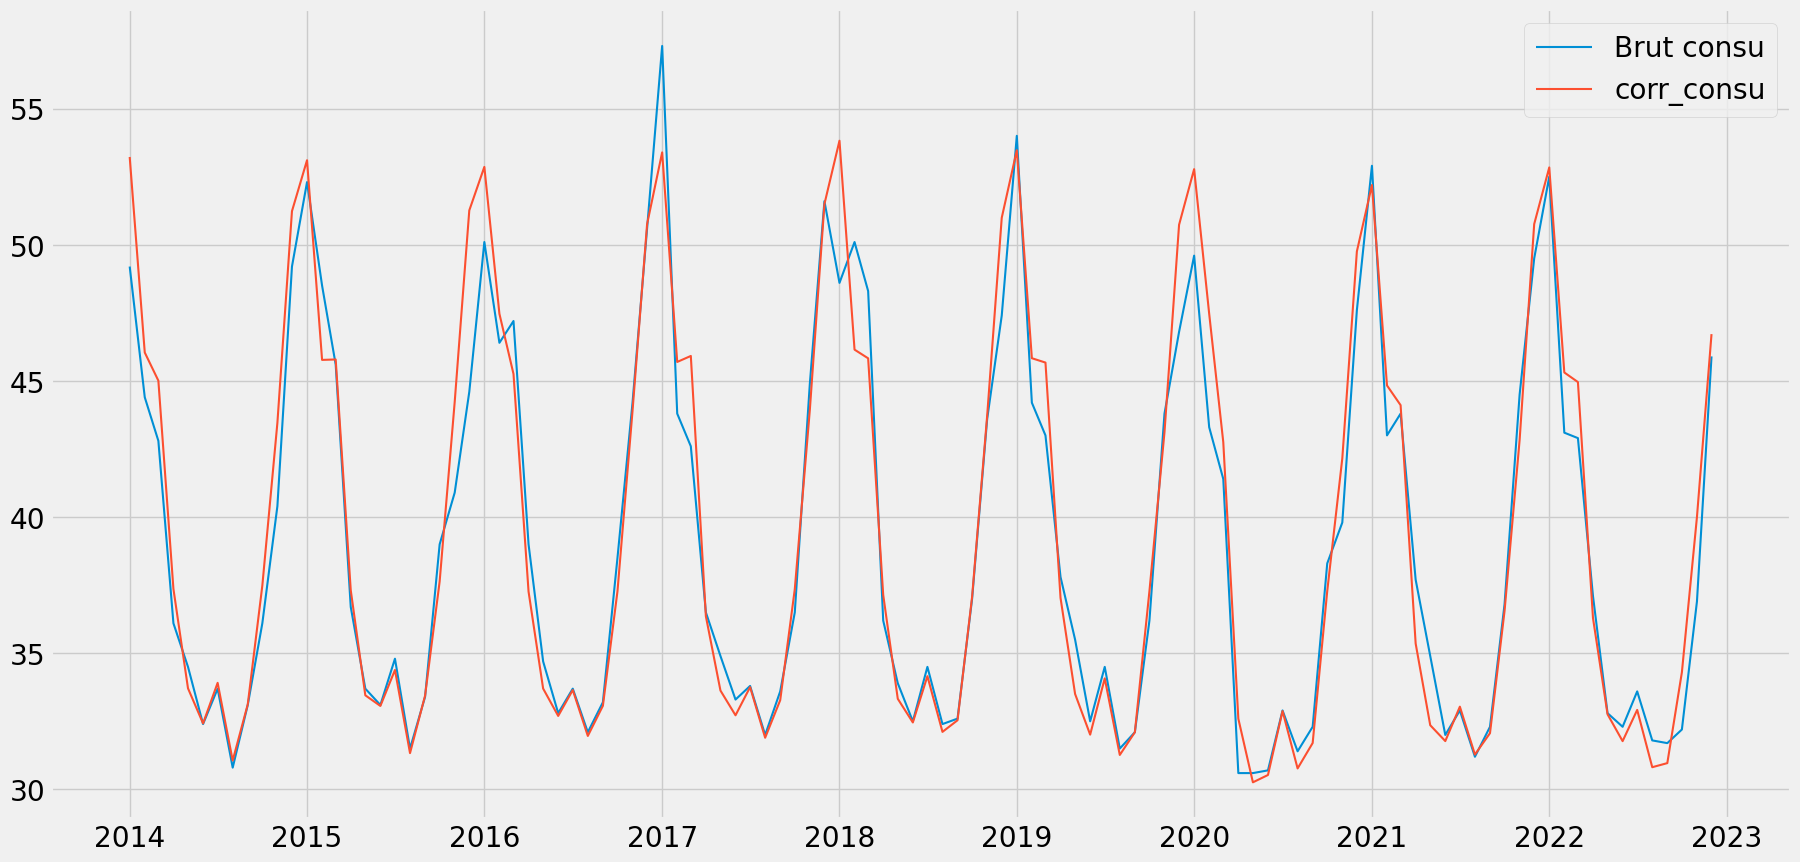

In [16]:
#Visualization of curves consumption 
plt.plot(df1, label = "Brut consu") #brut electricity consumption 
plt.plot(df2, label = "corr_consu") #corrected electricity consuption 
plt.legend() 
plt.show()

In [17]:
x=df1['Valeur (TWh)'].index
y=df1['Valeur (TWh)'].values
a=df2['Valeur (TWh)'].index
b=df2['Valeur (TWh)'].values

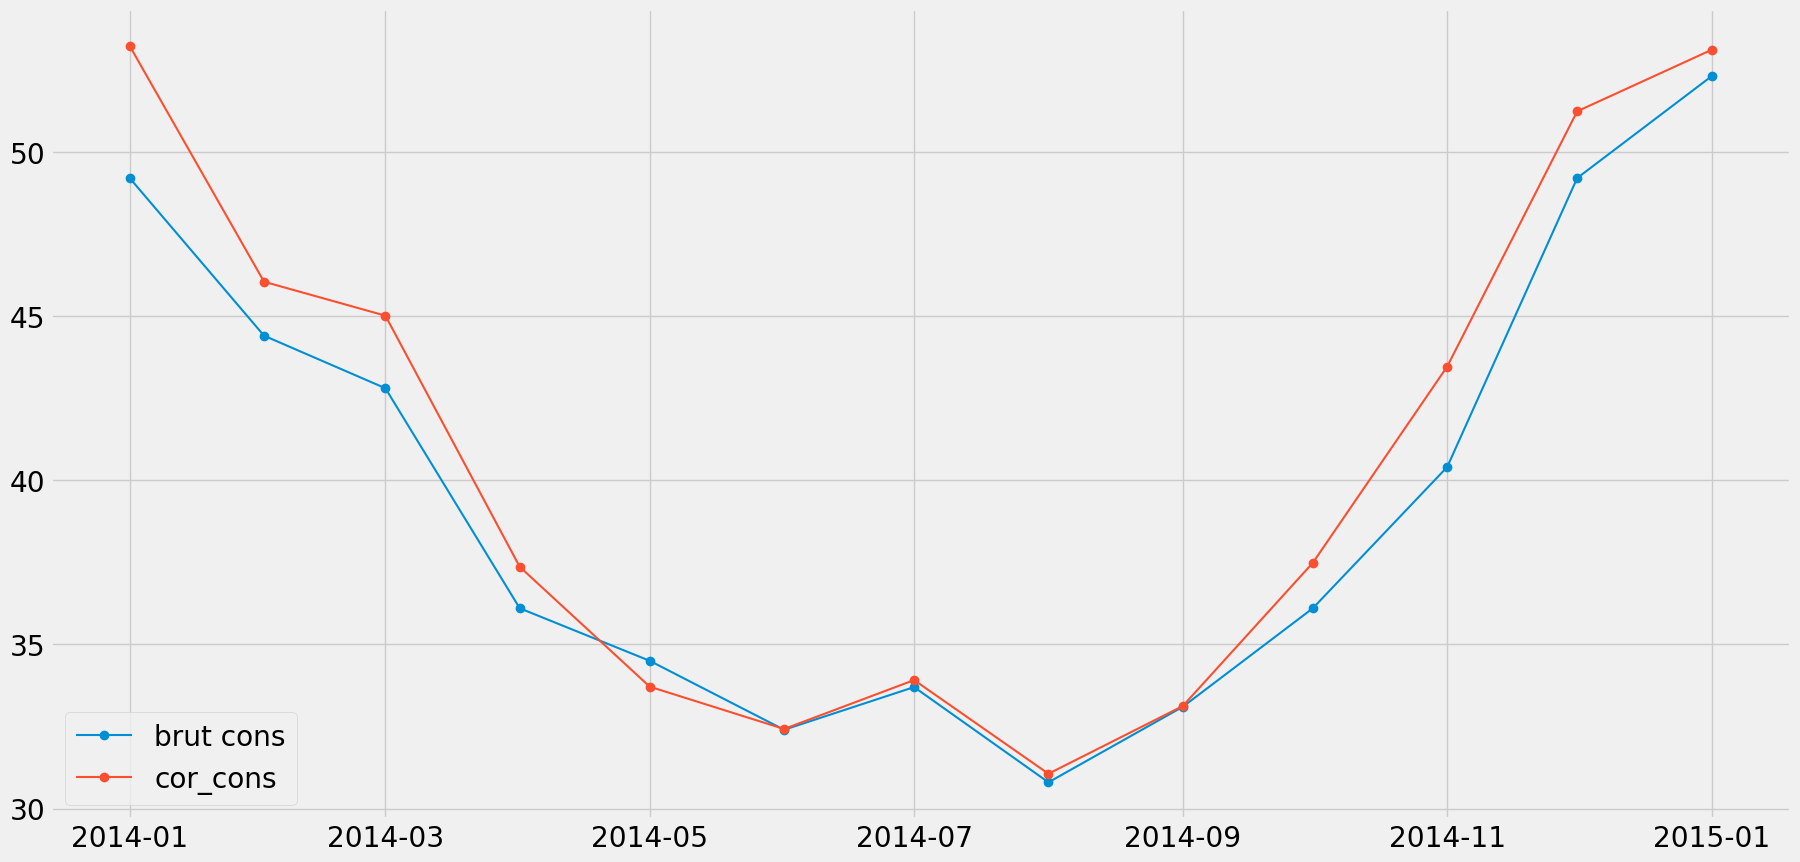

In [18]:
#Zoom (12 months)
fig, ax = plt.subplots()
ax.plot_date(x[:13], y[:13],  linestyle="solid", label = "brut cons")
ax.plot_date(a[:13], b[:13],  linestyle="solid",label = "cor_cons" ) 
plt.legend() 
plt.show()

Commment: 

The Visual observation of the evolution curves of electricity consumption (raw and corrected) shows that we are faced with consumption which is characterized by strong seasonality and relative stationarity with the absence of a real trend.
In order to verify the accuracy of these findings, we will apply an automatic decomposition on our time series.

2. Time series decomposition 

2.1. Decompostion with additive model

In [19]:
# Decomposition of time series (raw consumption)
from statsmodels.tsa.seasonal import seasonal_decompose
TSA1=seasonal_decompose(df1, model='additive',period=12)

<Figure size 1200x800 with 0 Axes>

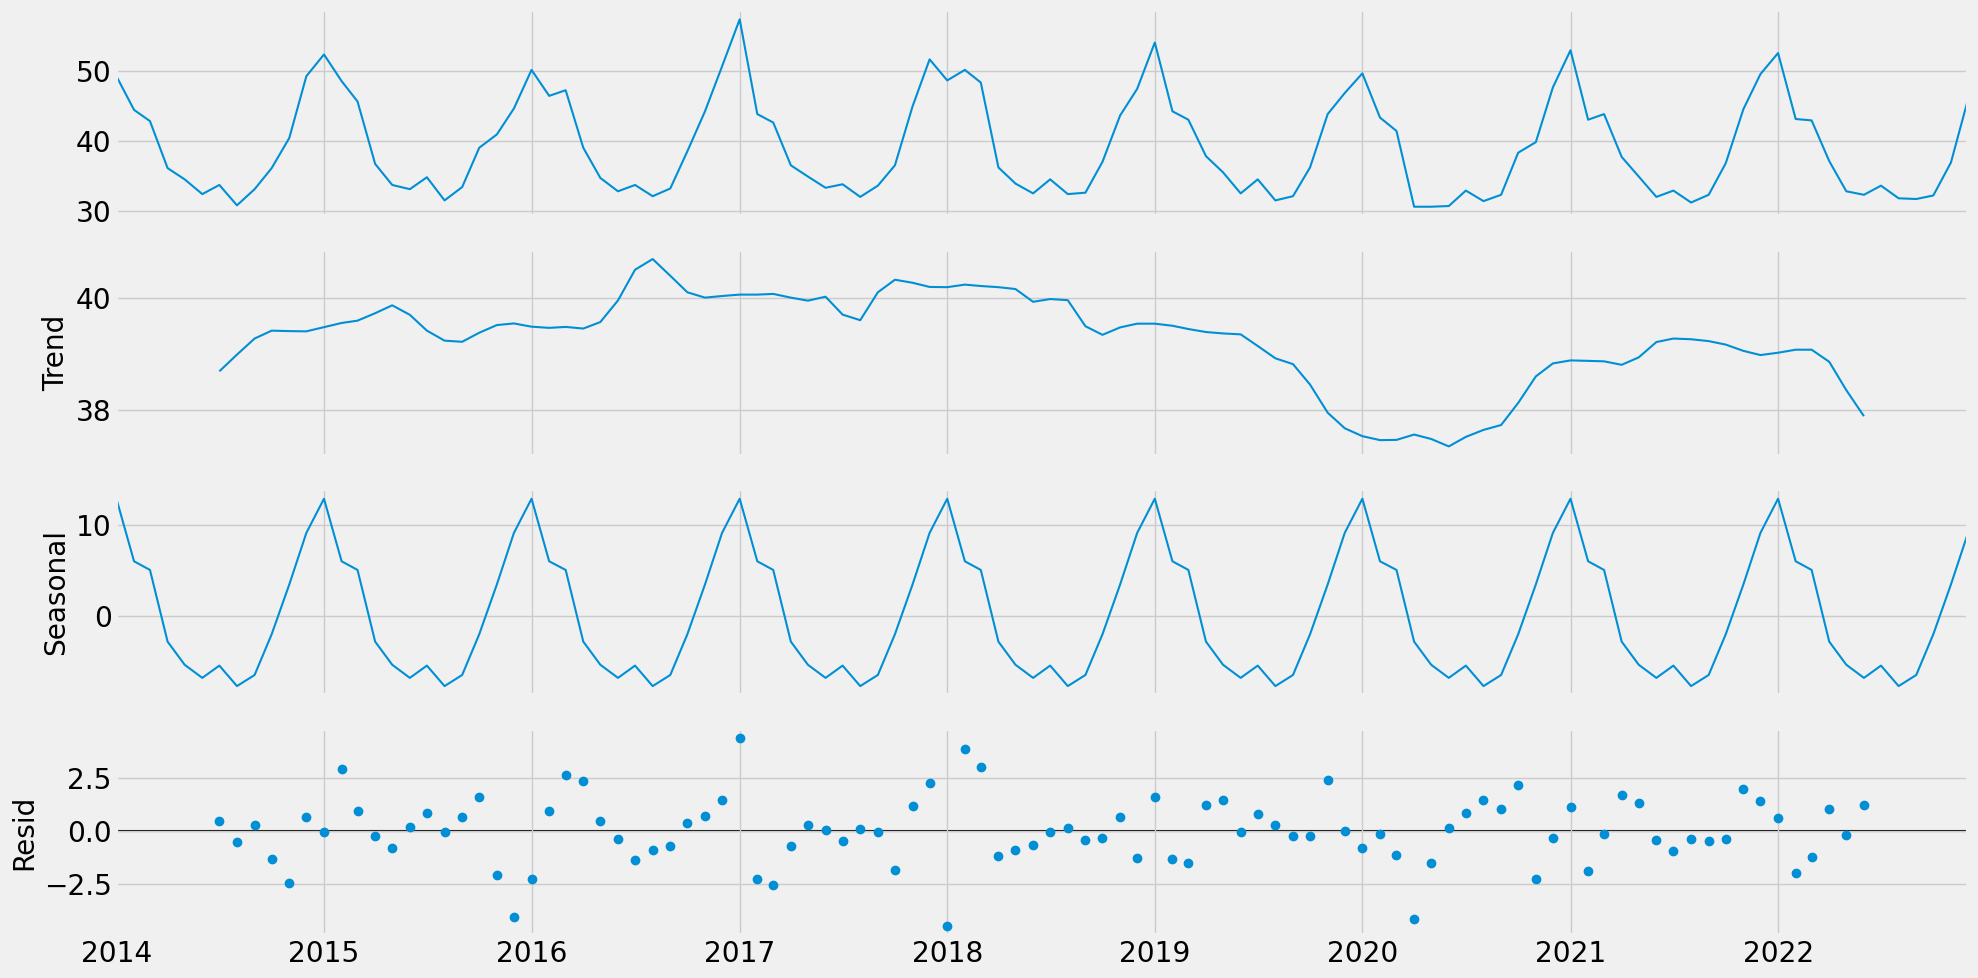

In [20]:
# graphs of decomposition 
plt.figure(figsize=(12,8))
TSA1.plot()
plt.show()

<Figure size 1200x800 with 0 Axes>

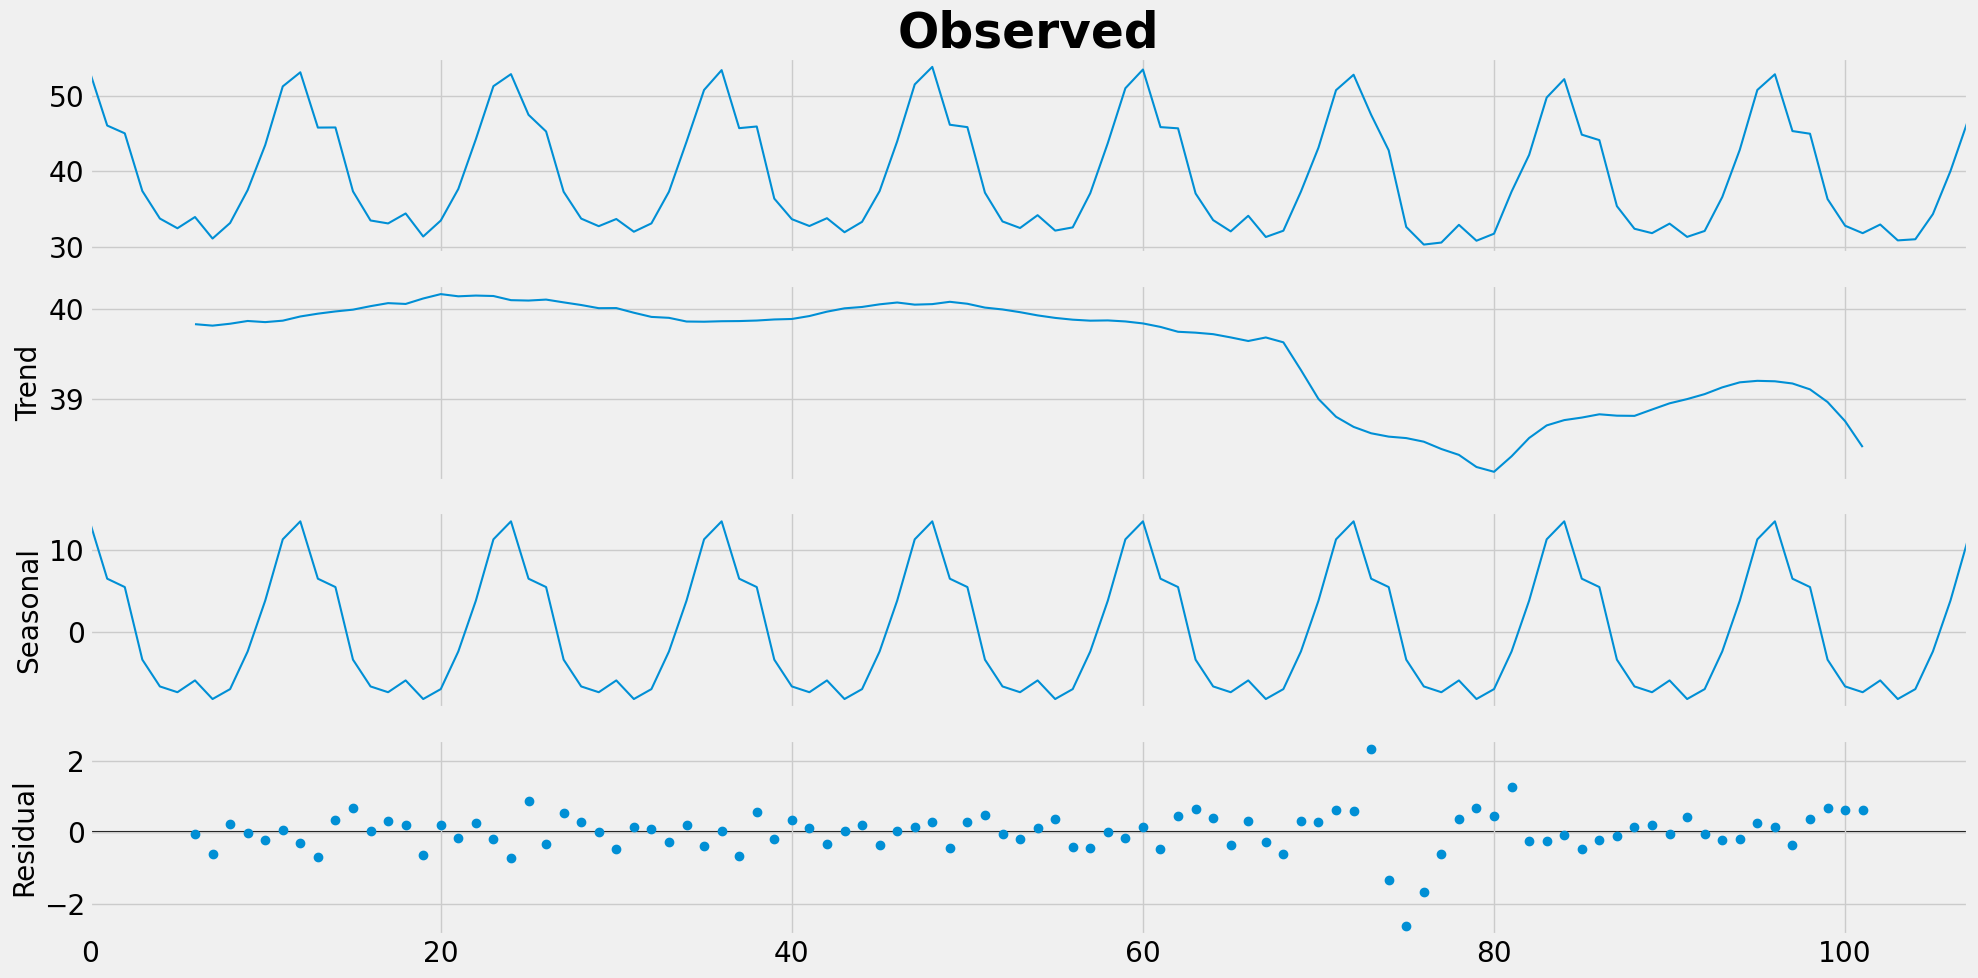

In [21]:
# Decomposition of time series (corrected consumption)
from statsmodels.tsa.seasonal import seasonal_decompose
TSA2=seasonal_decompose(b, period=12)
plt.figure(figsize=(12,8))
TSA2.plot()
plt.show()

Commntaire: 

We can notice that our time series are characterized by remarkable seasonality with an absence of a real trend and residual which varies between -2.5 and 2.5 for gross consumption and -2 and 2 for corrected consumption. Our study will therefore focus on the corrected consumption series.

2.2.Decomposition with multiplicative model 

<Figure size 1200x800 with 0 Axes>

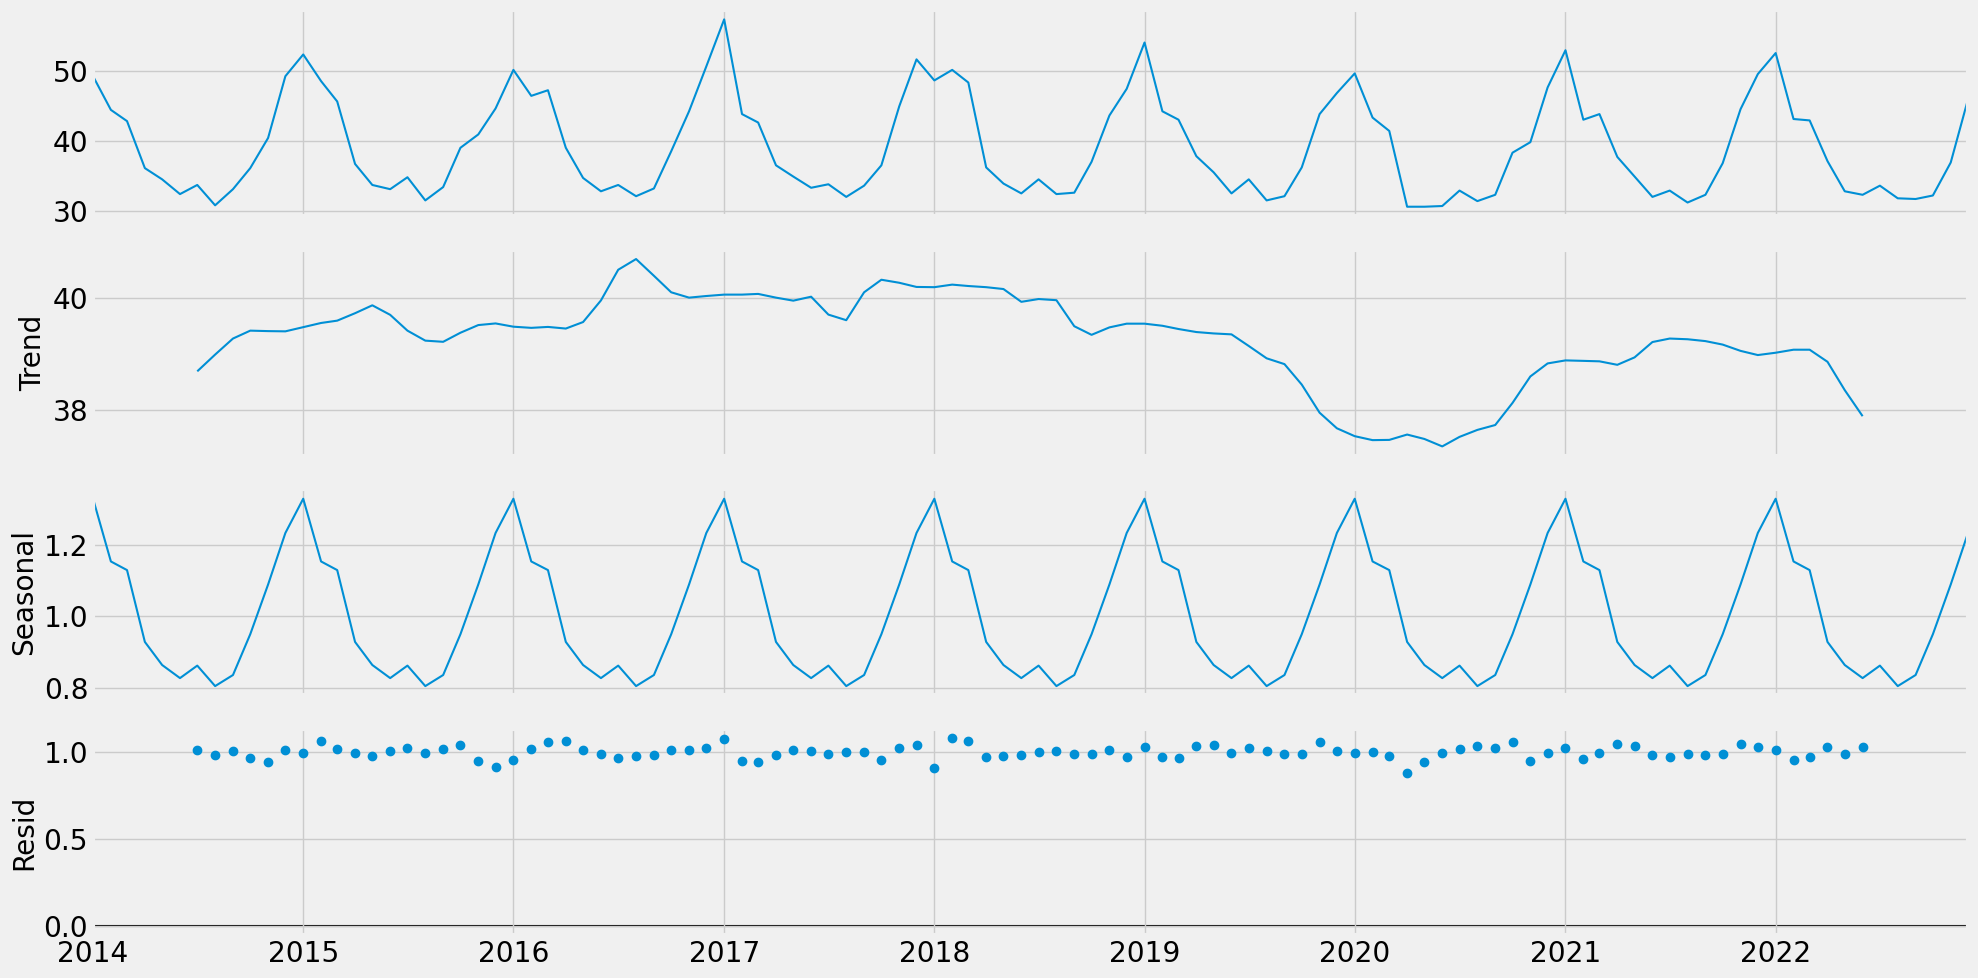

In [22]:
# Decomposition of time series (raw consumption)
from statsmodels.tsa.seasonal import seasonal_decompose
TSA3=seasonal_decompose(df1, model='multiplicative', period=12)
plt.figure(figsize=(12,8))
TSA3.plot()
plt.show()

<Figure size 1200x800 with 0 Axes>

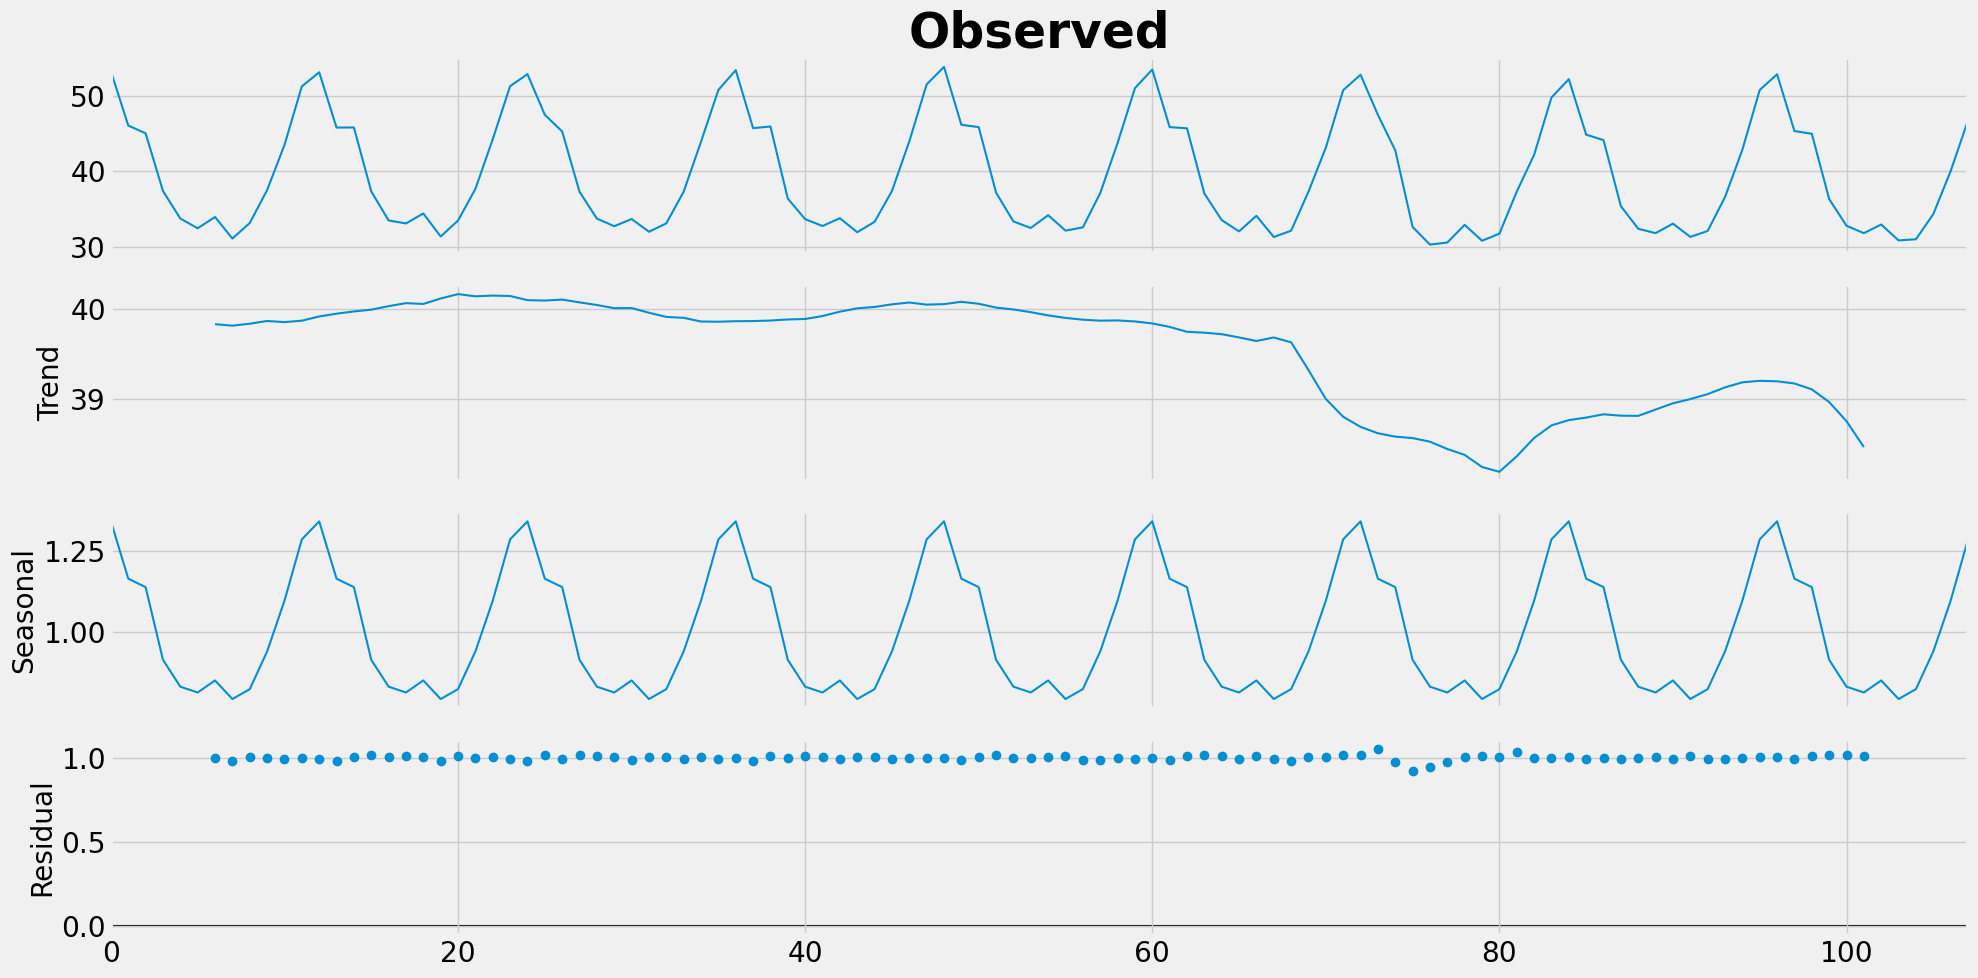

In [23]:
# Decomposition of time series (corrected consumption)
from statsmodels.tsa.seasonal import seasonal_decompose
TSA3=seasonal_decompose(b, model='multiplicative', period=12)
plt.figure(figsize=(12,8))
TSA3.plot()
plt.show()

Comment:

We can notice that at the residual level, with the multiplicative decomposition, that there is a low variance compared to the additive decomposition. We are therefore faced with a multiplicative model.
We will therefore apply a log function to our series to obtain an additive model.


2.3.From Multiplicative model to additive model:

In [24]:
# Add log to Time serie
df=np.log(df2)

<Figure size 1200x800 with 0 Axes>

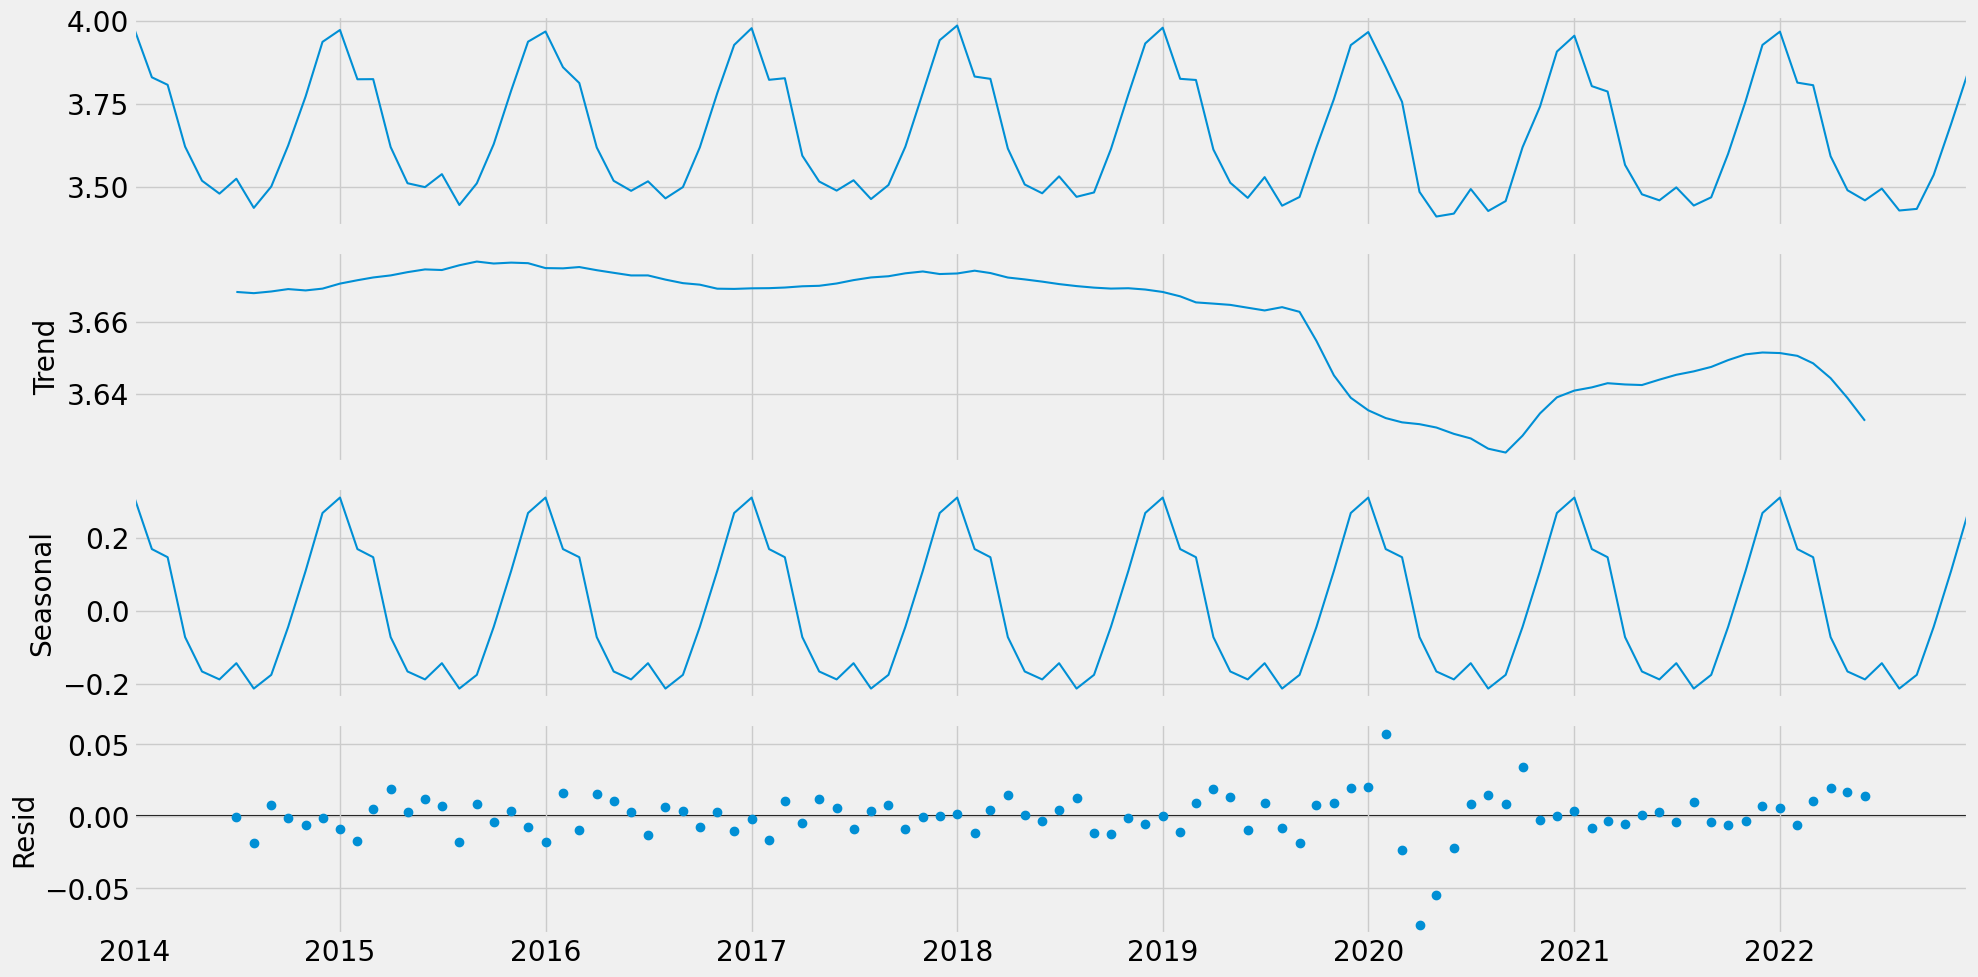

In [25]:
# Application of a log. to move to an additive model
from statsmodels.tsa.seasonal import seasonal_decompose
TSA3=seasonal_decompose(df, model='additive', period=12)
plt.figure(figsize=(12,8))
TSA3.plot()
plt.show()

Comment:

We can notice the low variance (+/-0.05) of the residual after applying the log to our time series.


2.4. Stationnarity of time serie:

Observation with the naked eye of the curve of our time series shows a large degree of stationarity. To verify this, we will use two recognized stationarity tests:
-Adfuller:
-KPSS:

Afin d'étudier la stationarité de la série temporelle étudiée, nous allons utliser la fonction "adfuller" de  la bibliothèque "statsmodels".
In order to study the stationarity of the time series studied, we will use the "adfuller" function from the "statsmodels" library.

a) AdFuller and KPSS tests 

In [26]:
# Stationarity test with ADFuller
from statsmodels.tsa.stattools import adfuller
result=adfuller(df.values)
print(f'ADF Statitic:{result[0]}')
print(f'p-value:{result[1]}')
print(f'Critical values:{result[4]}')

ADF Statitic:-0.5798869070770268
p-value:0.8754623044191909
Critical values:{'1%': -3.5011373281819504, '5%': -2.8924800524857854, '10%': -2.5832749307479226}


Comment:

Augmented Dickey-Fuller test (ADF): The time series is considered stationary if the p-value is low (according to the null hypothesis) and if the critical values at confidence intervals of 1%, 5%, 10% are as close as possible to ADF (Augmented Dickey-Fuller) statistics
the statistical ADF value is greater than the critical value (1%), and the p_value>5%, we can therefore deduce that our series is not stationary according to the AdFuller model.

In [27]:
# Stationarity test with KPSS
from statsmodels.tsa.stattools import kpss
def kpss_test(series, **kw):    
    statistic, p_value, n_lags, critical_values = kpss(series, **kw)
    # Format Output
    print(f'KPSS Statistic: {statistic}')
    print(f'p-value: {p_value}')
    print(f'num lags: {n_lags}')
    print('Critial Values:')
    for key, value in critical_values.items():
        print(f'   {key} : {value}')
    print(f'Result: The series is {"not " if p_value < 0.05 else ""}stationary')

kpss_test(df)

KPSS Statistic: 0.06365805261273816
p-value: 0.1
num lags: 5
Critial Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
Result: The series is stationary


C:\Users\USER\AppData\Local\Temp\ipykernel_12256\2291456482.py:4: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  statistic, p_value, n_lags, critical_values = kpss(series, **kw)


Comment:

We can notice that KPSS is lower than the critical values which shows that the series is stationary. the KPSS test agrees with observation with the naked eye.

Assumption:

A stationarity of a time series allows the training model a lower margin of error. Therefore and given the results obtained, we will consider that the time series studied at this phase is relatively stationary.
This relative stationarity will disappear with the application of order 1 differentiation on our time series. (see the autocorrelation with differentiation part)

b) Autocorrelation without differentiation

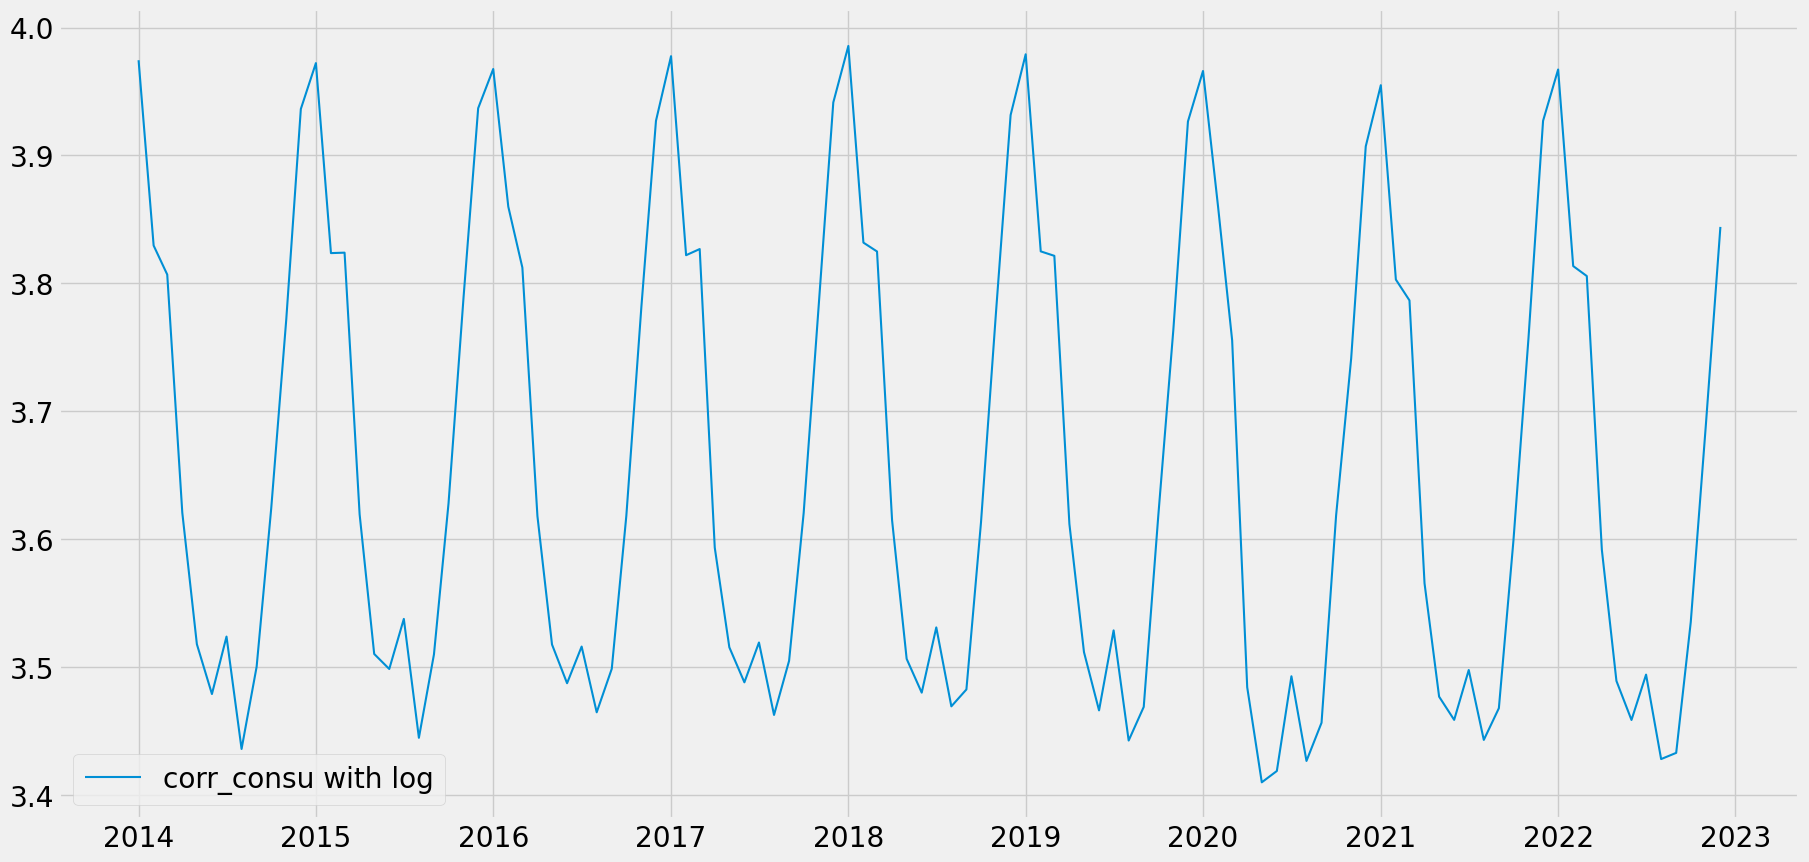

In [28]:

plt.plot(df, label = "corr_consu with log") #corrected electricity consuption 
plt.legend() 
plt.show()

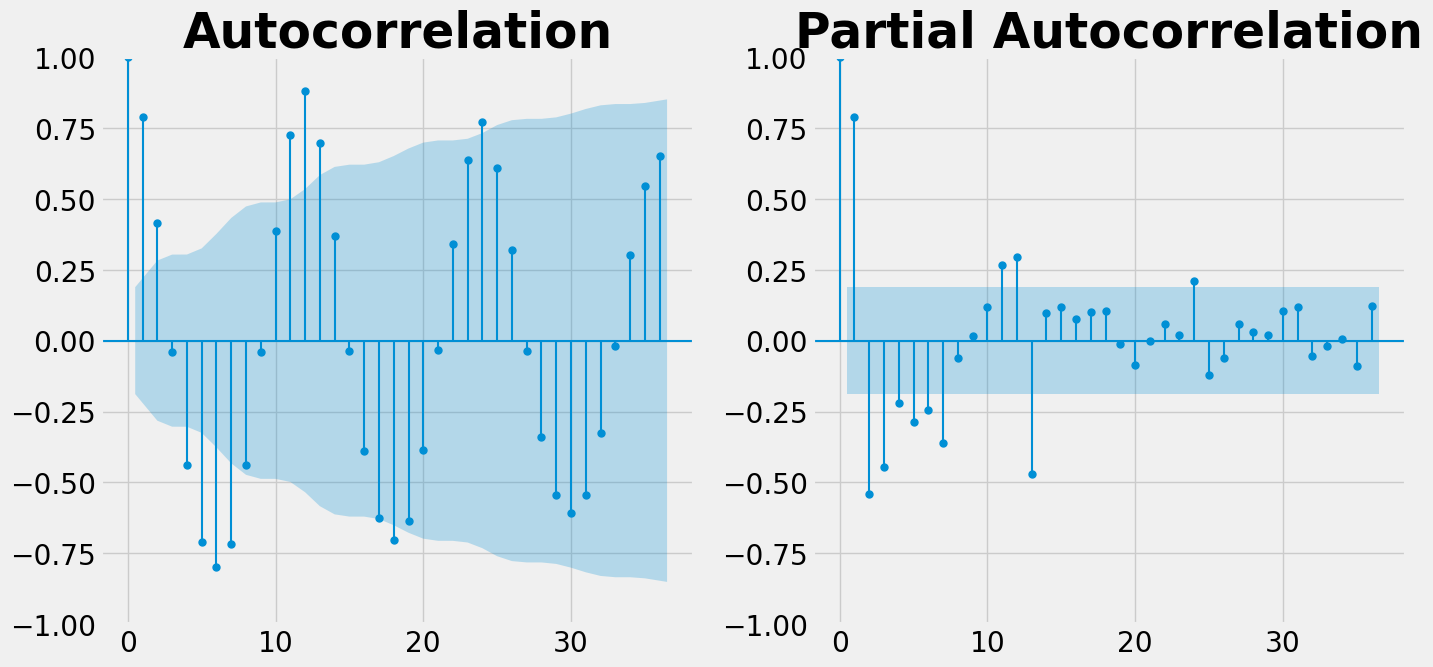

In [29]:
# Autocorrelation/partial autocorrelation graphs 
fig, (ax1,ax2)=plt.subplots(1,2, figsize=(15,7))
plot_acf(df, lags=36, ax=ax1)
plot_pacf(df, lags=36, ax=ax2)
plt.show()

Comment:

According to the auto-correlation/partial auto-correlation graphs, we can notice the existence of repetitive spikes this is due to the non-stationarity of the time series studied.

c) Autocorrelation with differentiation

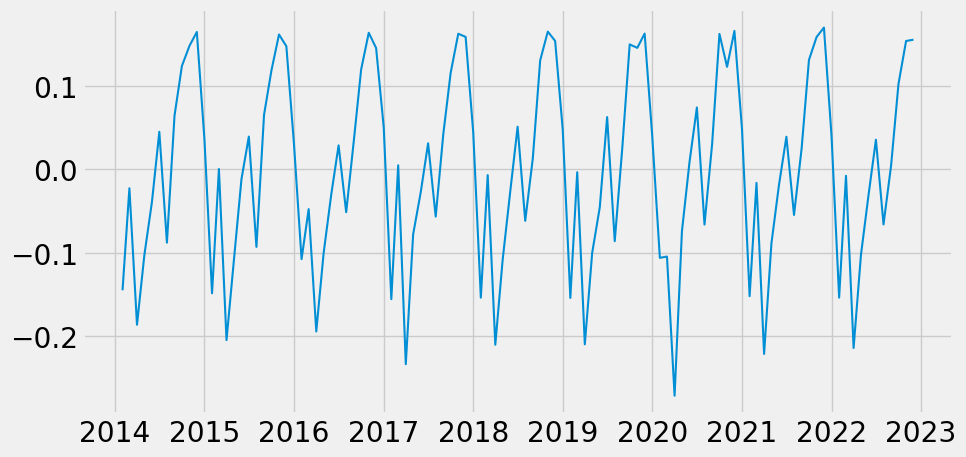

In [30]:
plt.figure(figsize=(10,5))
plt.plot(df.diff())

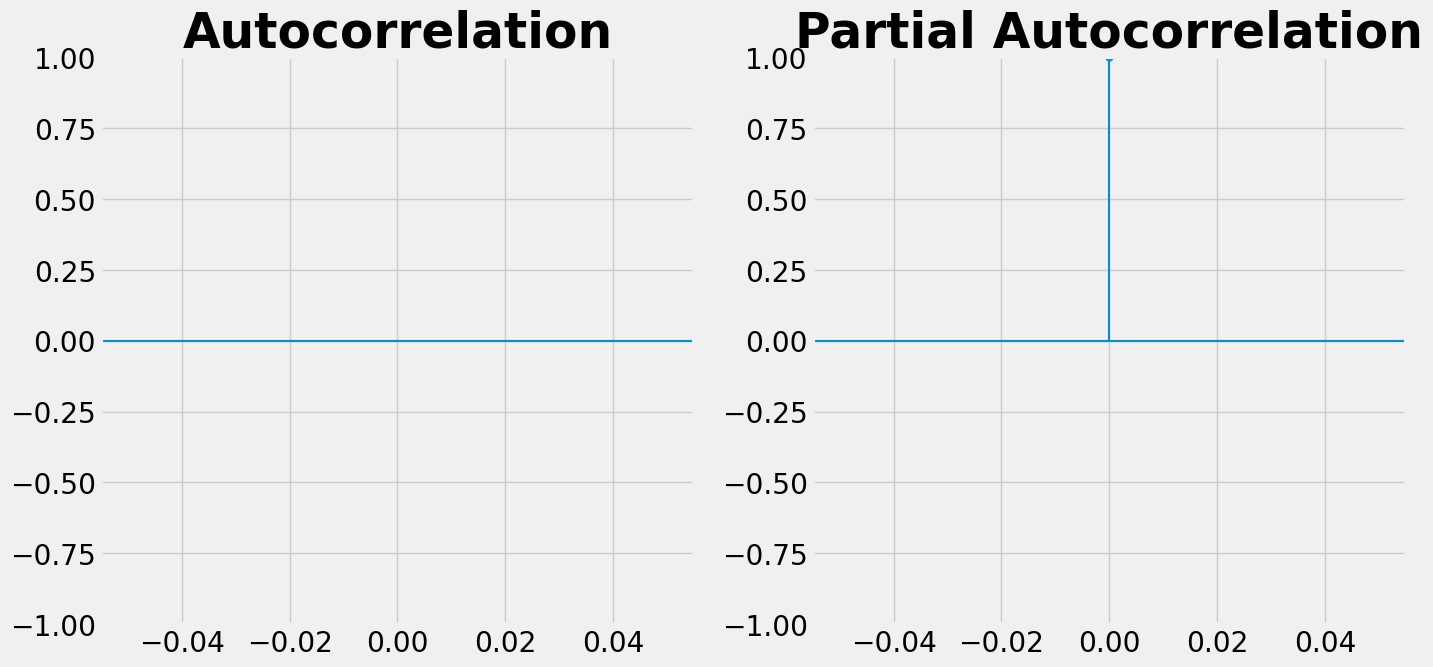

In [31]:
# Autocorrelation/partial autocorrelation graphs with differentiation
fig, (ax1,ax2)=plt.subplots(1,2, figsize=(15,7))
plot_acf(df.diff(1), lags=36, ax=ax1)
plot_pacf(df.diff(1), lags=36, ax=ax2)
plt.show()

We can notice that after the application we obtained a zero correlation, this is due to the disappearance of the noise of non-stationarity. We can recheck stationarity with KPSS and ADF.

In [32]:
print(df.diff().head)
D=df.diff()


<bound method NDFrame.head of             Valeur (TWh)
Date                    
2014-01-01           NaN
2014-02-01     -0.144915
2014-03-01     -0.022691
2014-04-01     -0.186231
2014-05-01     -0.102800
...                  ...
2022-08-01     -0.066046
2022-09-01      0.004856
2022-10-01      0.102256
2022-11-01      0.153734
2022-12-01      0.155271

[108 rows x 1 columns]>


In [33]:
D.isna().sum()

Valeur (TWh)    1
dtype: int64

In [34]:
D=D.dropna()
D

,Valeur (TWh)
Date,
2014-02-01,-0.144915
2014-03-01,-0.022691
2014-04-01,-0.186231
2014-05-01,-0.102800
2014-06-01,-0.038955
...,...
2022-08-01,-0.066046
2022-09-01,0.004856
2022-10-01,0.102256


In [41]:
D.isna().sum()

Valeur (TWh)    0
dtype: int64

In [42]:
#Rechecking stationarity with KPSS:
kpss_test(D)

KPSS Statistic: 0.03778016897231258
p-value: 0.1
num lags: 4
Critial Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
Result: The series is stationary


C:\Users\USER\AppData\Local\Temp\ipykernel_14120\2291456482.py:4: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  statistic, p_value, n_lags, critical_values = kpss(series, **kw)


In [43]:
#Rechecking stationarity with AdFuller
result=adfuller(D.values)
print(f'ADF Statitic:{result[0]}')
print(f'p-value:{result[1]}')
print(f'Critical values:{result[4]}')

ADF Statitic:-4.215376330340051
p-value:0.0006205044809247556
Critical values:{'1%': -3.5011373281819504, '5%': -2.8924800524857854, '10%': -2.5832749307479226}


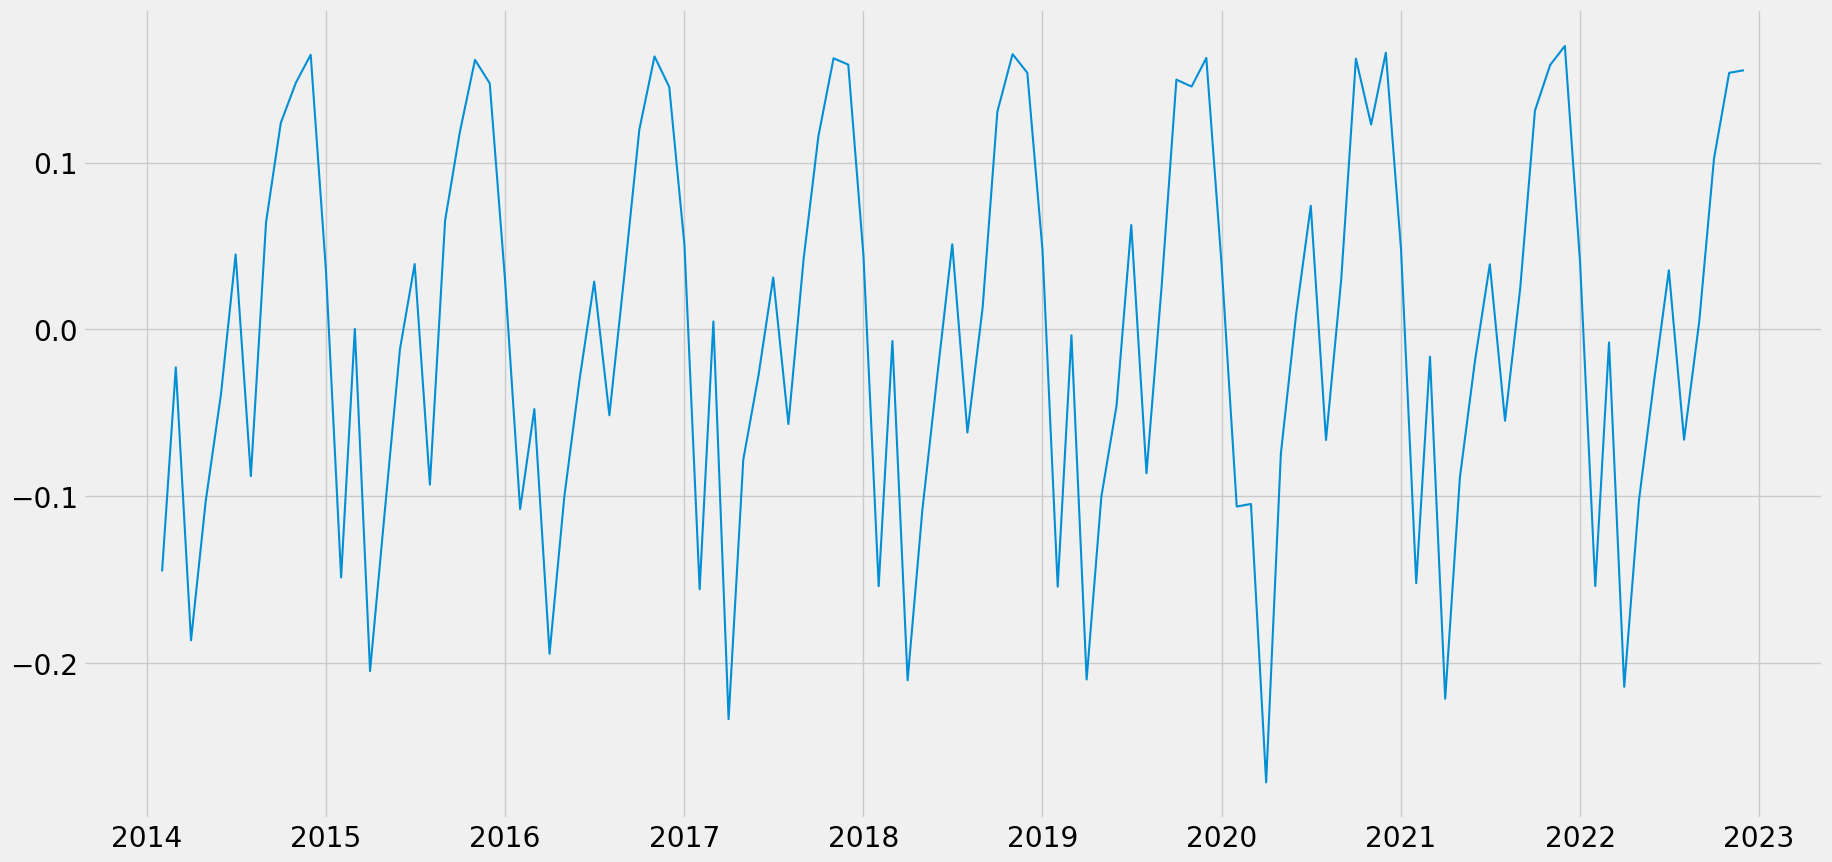

In [44]:
plt.plot(D)

The test results of KPSS and Adfuller are in agreement, so we obtained a stationary time series after applying differentiation. It is wise that we look for an ML training model which takes care of the perfect non-stationarity of the series studied (model which applies differentiation) and which can deal with cases of series which are characterized by strong seasonality.

III. Machine learnning solutions --------------------------------------------------------------------------------------

At this stage, we must choose a model that takes into consideration the poor stationarity of our time series and its seasonality.
Among the most used models with time series we can find the ARIMA and SARIMA models. We will therefore start by testing the simplest one. That is to say, the ARIMA algorithm, then, we will test the SARIMA algorithm in order to achieve satisfactory results.


1. ARIMA Model 

In [45]:
import sklearn
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima.model import ARIMA

In [46]:
df.head(), df.shape

(            Valeur (TWh)
 Date                    
 2014-01-01      3.974491
 2014-02-01      3.829576
 2014-03-01      3.806885
 2014-04-01      3.620654
 2014-05-01      3.517854,
 (108, 1))

In [48]:

import warnings
warnings.filterwarnings('ignore')
# Dataset split
series=df['Valeur (TWh)']
size = int(len(series) * 0.75)
train, test = series[:size], series[size:]
history = [x for x in train]
ar_predictions =list()

# walk forward over time steps in test
for t in range(len(test)):
    model = ARIMA(history, order=(1,1,1) )  # order = (p,d,q) AR(p) I(d) MA(q)
    model_fit = model.fit()
    output = model_fit.forecast() # Get 1 prediction
    yhat = output[0]
    ar_predictions.append(yhat)
    obs = test[t]
    history.append(test[t])

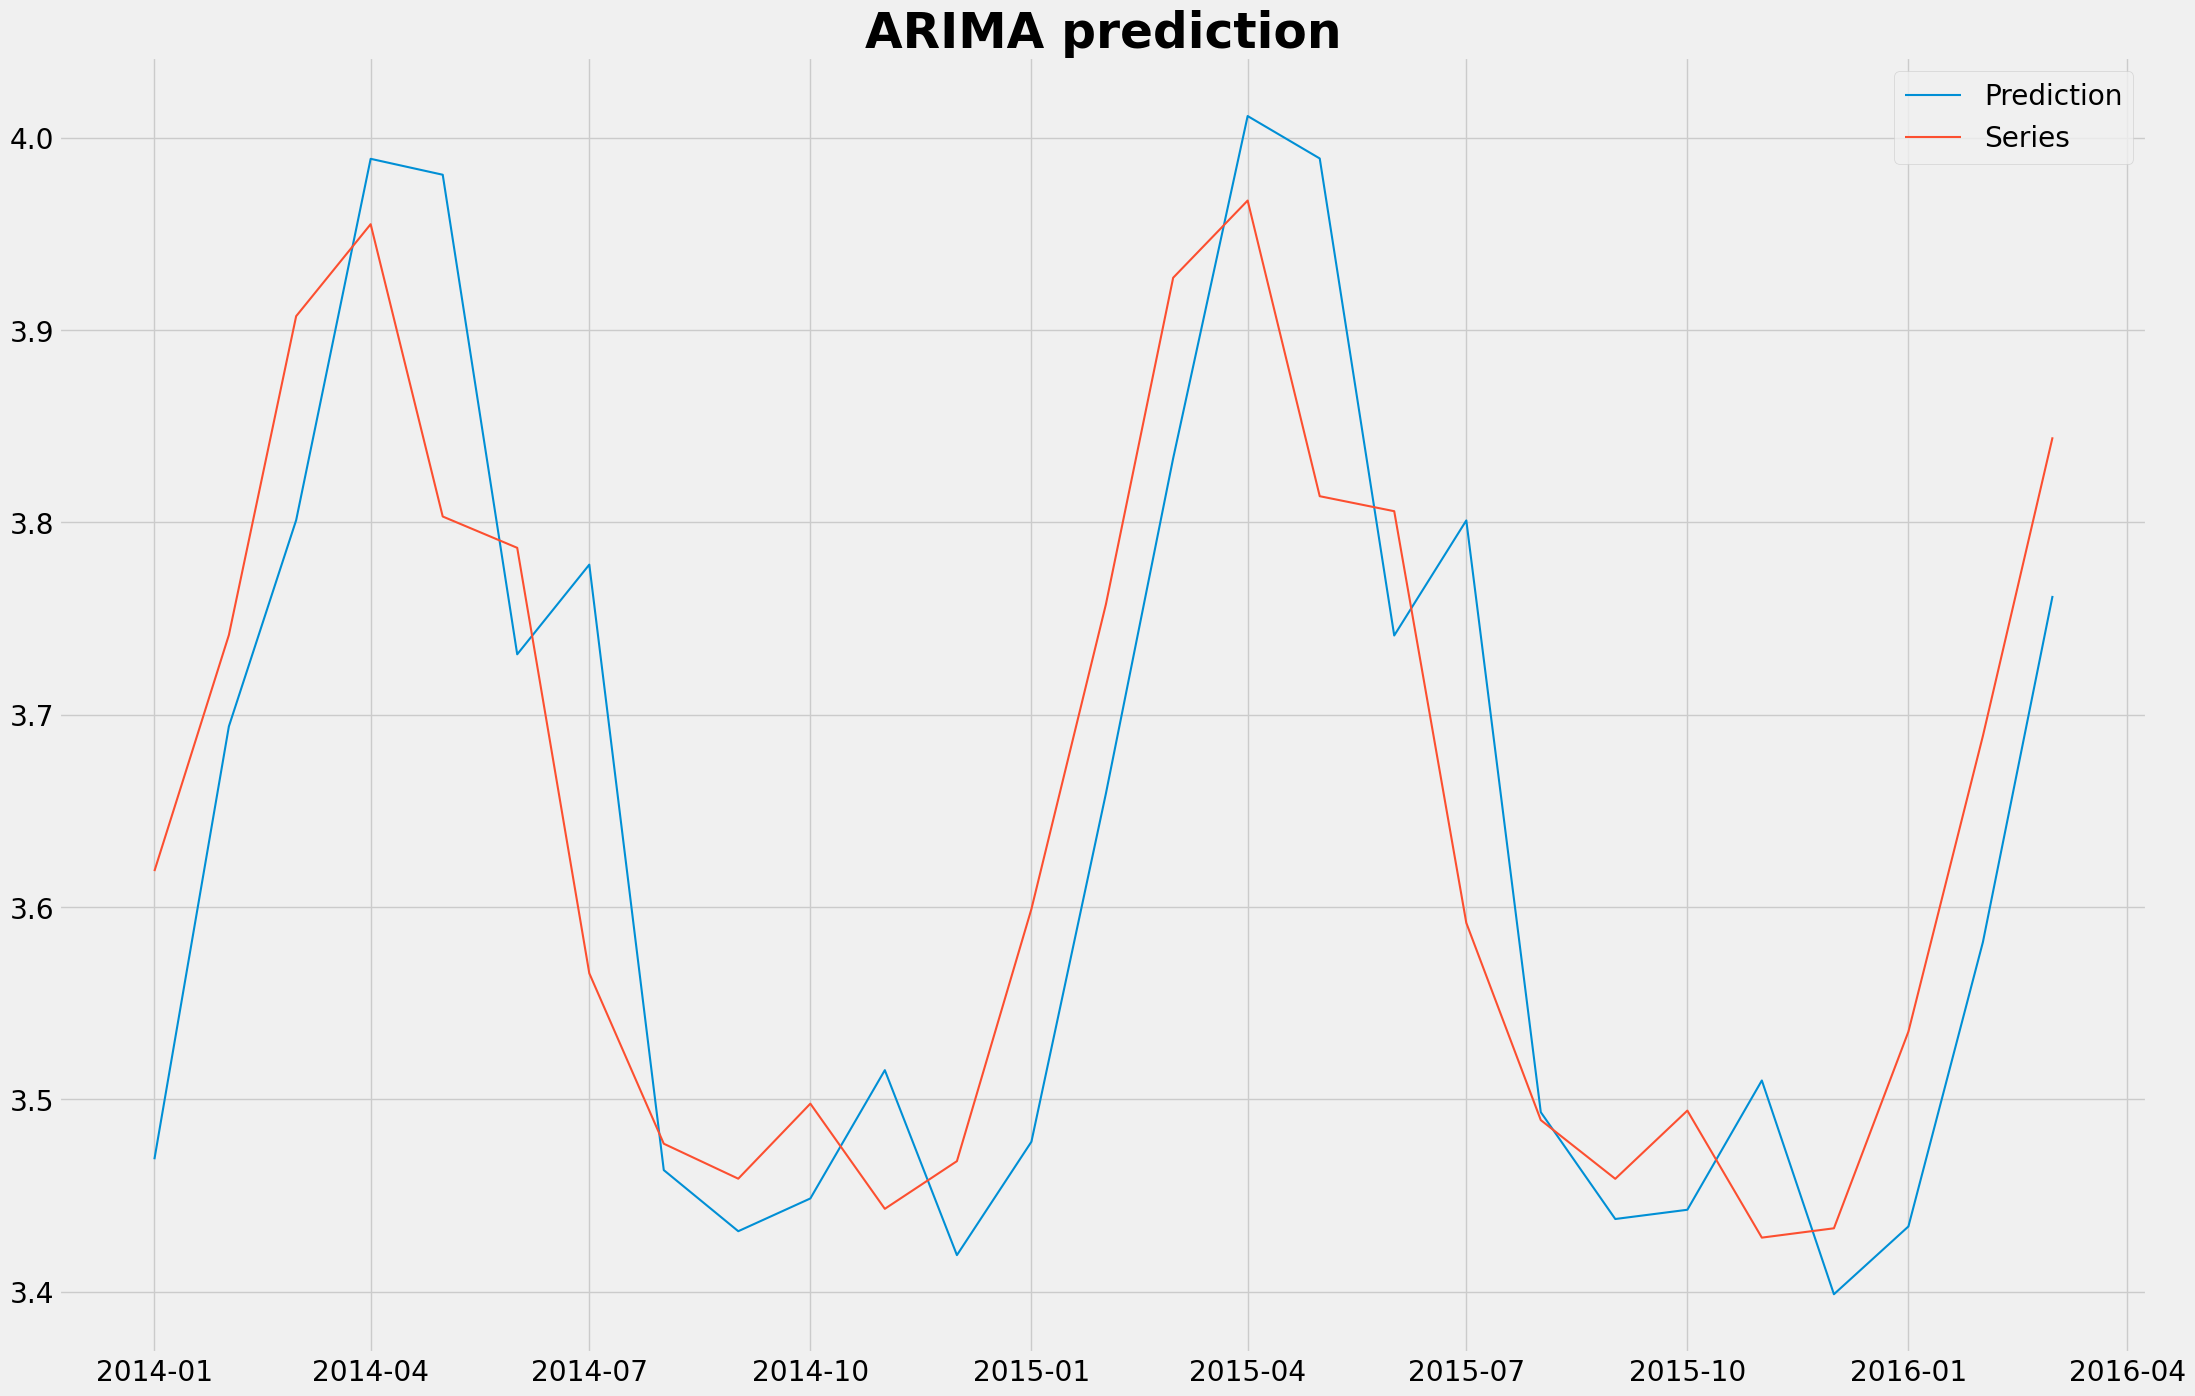

In [49]:
# Result visualization
plt.figure(figsize=(24,16))
plt.plot(df.index[:27],ar_predictions,label="Prediction")
plt.plot(df.index[:27],test.values,label="Series")
plt.title("ARIMA prediction")
plt.legend()
plt.show()

In [50]:
#MSE calculation
MSE=mean_squared_error(ar_predictions, test)
print(f'Mean squared error={mean_squared_error(ar_predictions, test)}')

Mean squared error=0.010415853158625839


2) Application of the SARIMA model on a series with pre-processing

In [55]:
import statsmodels
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.statespace.sarimax import SARIMAX     #sarimax
import warnings
warnings.filterwarnings('ignore')

In [56]:

# Dataset split 
size = int(len(df['Valeur (TWh)']) * 0.75)
train1, test1 = df['Valeur (TWh)'][0:size], df['Valeur (TWh)'][size:len(df['Valeur (TWh)'])]
test1 = test1.reset_index()['Valeur (TWh)']
history1 = [x for x in train1]
predictions1 = list()

for t in range(len(test1)):
    model1 = SARIMAX(history1
                    , order=(1, 1, 1) # order = (p,d,q) AR(p)I(d)MA(q)
                    , seasonal_order=(1, 1, 1, 12) # order = (P,D,Q,m) Seasonal AR(P)I(D)MA(Q) m Seasonal Period
                    )
    model_fit = model1.fit(disp=False)
    output = model_fit.forecast()
    yhat = output[0]
    predictions1.append(yhat)
    obs = test1[t]
    history1.append(yhat)

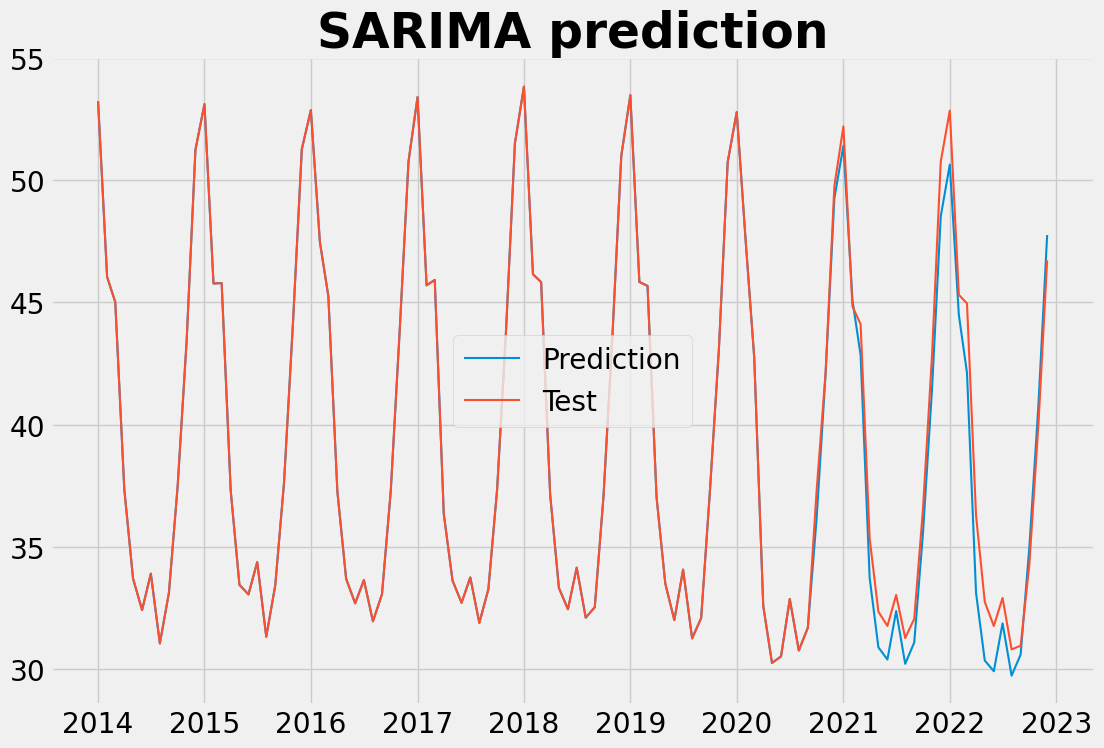

In [57]:
history1 = [x for x in train1]

hist_pred1 = np.concatenate([history1, predictions1])
hist_ts1 = np.concatenate([history1, test1]) 
H_pred1 = pd.DataFrame(hist_pred1, columns=['Values TWh'], index=df.index) #df.index=time axis 
H_test1=pd.DataFrame(hist_ts1, columns=['Values TWh'], index=df.index)
plt.figure(figsize=(12,8))
plt.plot(np.exp(H_pred1), label='Prediction')
plt.plot(np.exp(H_test1), label='Test')
plt.title("SARIMA prediction")
plt.legend()
plt.show()

In [289]:
# MSE calculation (SARIMA with pre-processed time series)
print(f'MSE={mean_squared_error(predictions1, test1)}')
MSE1=mean_squared_error(predictions1, test1)

MSE=0.001577346047982507


3) Application of the SARIMA model on a series without pre-processing

In [312]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

size = int(len(df2['Valeur (TWh)'].dropna()) * 0.75)
train2, test2 = df2['Valeur (TWh)'].dropna()[0:size], df2['Valeur (TWh)'].dropna()[size:len(df2['Valeur (TWh)'].dropna())]
test = test2.reset_index()['Valeur (TWh)']
history2 = [x for x in train2]
predictions2 = list()
# order = (p,d,q) AR(p)I(d)MA(q), seasonal_order=(1, 1, 1, 12) # order = (P,D,Q,m) Seasonal AR(P)I(D)MA(Q) m Seasonal Period
for t in range(len(test)):
    model2 = SARIMAX(history2, order=(1, 1, 1) 
                )
    model_fit = model2.fit(disp=False)
    output = model_fit.forecast()
    yhat = output[0]
    predictions2.append(yhat)
    obs = test2[t]
    history2.append(yhat)

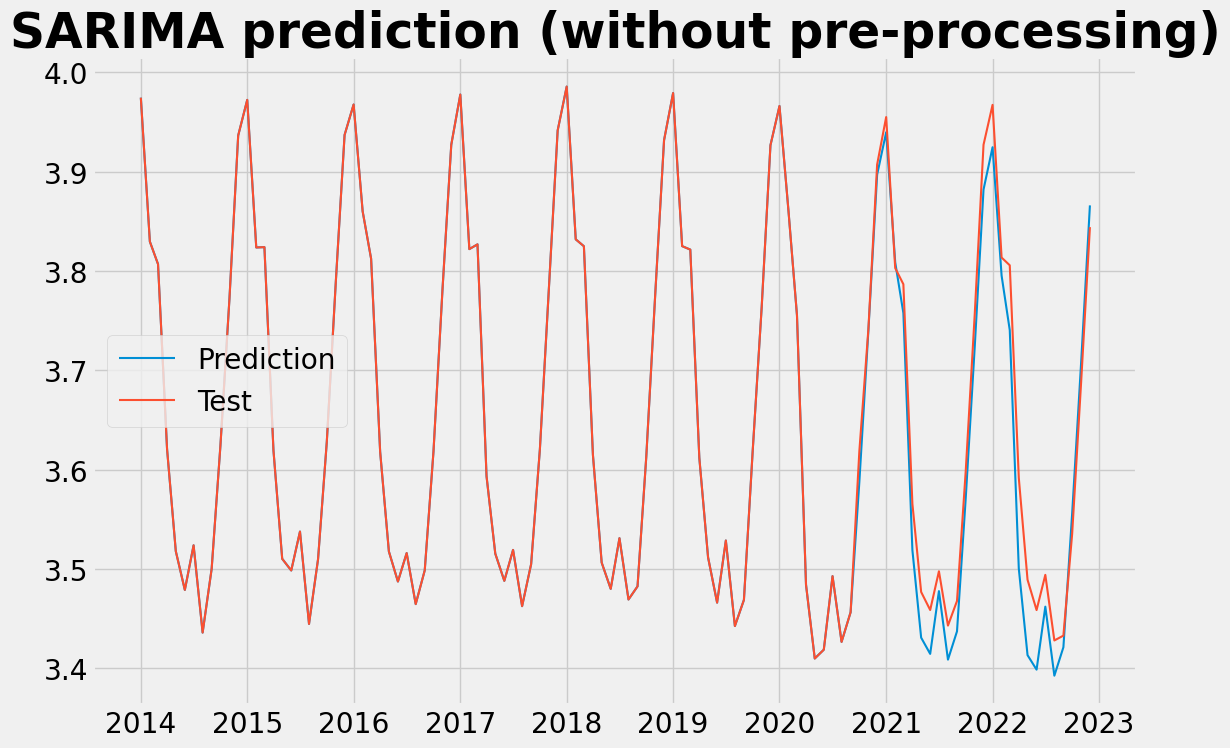

In [313]:
history = [x for x in train]

hist_pred2 = np.concatenate([history2, predictions2])
hist_ts2 = np.concatenate([history2, test2]) 
H_pred2 = pd.DataFrame(hist_pred1, columns=['Values TWh'], index=df2.index) #df2.index=time axis 
H_test2=pd.DataFrame(hist_ts1, columns=['Values TWh'], index=df.index)


plt.figure(figsize=(12,8))
plt.plot(H_pred2, label='Prediction')
plt.plot(H_test2, label='Test')
#plt.plot(df2/df1, label='coeff')
plt.title("SARIMA prediction (without pre-processing)")
plt.legend()
plt.show()

In [300]:
# MSE calculation (SARIMA with non-pre-proccessed time series)
print(f'MSE={mean_squared_error(predictions2, test2)}')
MSE2=mean_squared_error(predictions2, test2)

MSE=1.8393494199058067


In [318]:
#Comparison of different MSEs
print(f'MSE_ARIMA with pre-processing={MSE}')
print(f'MSE_SARIMA with pre-processing={MSE1}')
print(f'MSE_SARIMA without pr-processing={MSE2}')

MSE_ARIMA with pre-processing=0.010415853158625839
MSE_SARIMA with pre-processing=0.001577346047982507
MSE_SARIMA without pr-processing=1.8393494199058067


According to the different MSEs obtained, through the three tests and with the same hyper-parameters, we can notice that the SARIMAX algorithm with a pre-processed series presents a lower error. For our case, the use of SARIMAX is the most optimal solution.

We can thus use this model for the prediction of the correction coefficient which also varies over time.

df1: raw consumption 
df2: corrected consuption 
Coeff: correction coefficient 
Coeff=df2/df1 

In [319]:
Coeff=df2/df1
Coeff

,Valeur (TWh)
Date,
2014-01-01,1.081768
2014-02-01,1.037005
2014-03-01,1.051636
2014-04-01,1.034958
2014-05-01,0.977159
...,...
2022-08-01,0.969057
2022-09-01,0.976845
2022-10-01,1.065217


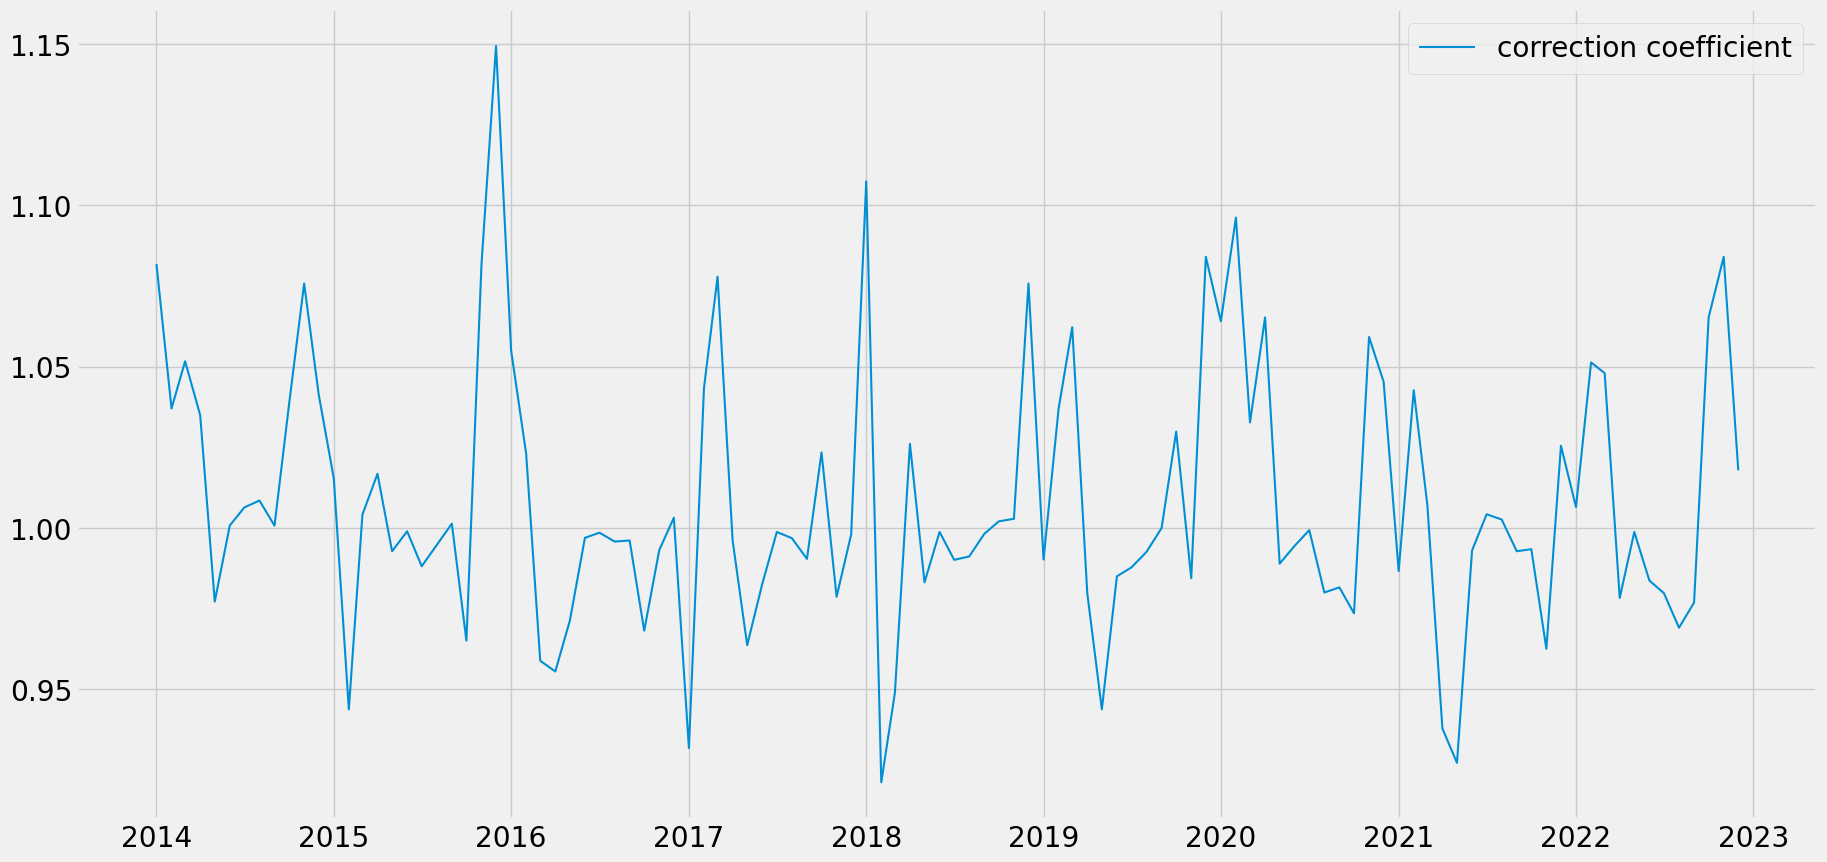

In [317]:
#  Curve of correction coefficient
plt.plot(Coeff, label='correction coefficient')
plt.legend()
plt.show()

sources:

https://analysesetdonnees.rte-france.com/bilan-electrique-synthese

https://www.edf.fr/groupe-edf/espaces-dedies/jeunes-enseignants/pour-les-jeunes/lenergie-de-a-a-z/lelectricite-au-quotidien/la-consommation-delectricite-en-chiffres

https://geometrein.medium.com/time-series-forecasting-with-sarimax-c352e4f2012e
https://skforecast.org/0.10.1/user_guides/forecasting-sarimax-arima
https://www.statsmodels.org/dev/examples/notebooks/generated/autoregressions.html

https://blog.statoscop.fr/timeseries-4.html

https://blog.statoscop.fr/timeseries-4.html

https://benjamin-balet.info/developpement/comment-utiliser-un-modele-de-ml-dans-une-application/